# Comparación de eficacia
### Modelos de Regresión

### Librerías necesarias

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps
from matplotlib.colors import Normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB

### Generación de datos a usar

In [6]:
train_data=pd.read_csv("../train.csv", encoding="latin1")
columnas_aUsar = ['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFullBath',
                  "TotalBsmtSF", "GrLivArea", "GarageCars", 'WoodDeckSF',
                  "FullBath"]
_train = train_data[columnas_aUsar]

y = train_data["SalePrice"]
X = _train

print("Columnas usadas (" + str(len(_train.columns)) + ") :\n"+ str(_train.columns))

Columnas usadas (9) :
Index(['OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFullBath',
       'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'WoodDeckSF', 'FullBath'],
      dtype='object')


In [7]:
# Separación de datos (entrenamiento y pruebas)
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1021, 9)
(438, 9)
(1021,)
(438,)


In [8]:
#Normalización de datos
scalerB = StandardScaler()  # Crear el escalador

X_train_scaled = scalerB.fit_transform(X_train)
X_test_scaled = scalerB.transform(X_test)

### Creación de modelos
Copy - paste de los modelos creados anteriormente

#### Modelo de regresión lineal

In [9]:
price = y_train.values.reshape(-1,1)
price_t = y_test.values.reshape(-1,1)

modeloRL = LinearRegression()
modeloRL.fit(X_train_scaled, price)
y_predRL = modeloRL.predict(X_test_scaled)

#### Modelo de árbol de decisión

In [10]:
# Entrenar modelo
modeloDT = DecisionTreeRegressor(max_depth=7)
modeloDT.fit(X_train_scaled, y_train)

# Predicciones
y_predDT = modeloDT.predict(X_test_scaled)

#### Modelo Random Forest

In [11]:
# Crear y entrenar el modelo
modeloRF = RandomForestRegressor(n_estimators=1000, max_depth=7)
modeloRF.fit(X_train_scaled, y_train)

# Hacer predicciones
y_predRF = modeloRF.predict(X_test_scaled)

#### Modelo Naive Bayes

In [12]:
# Crear y entrenar el modelo
modeloNB = GaussianNB(var_smoothing=1e-06)
modeloNB.fit(X_train_scaled,y_train)

# Hacer predicciones
y_predNB = modeloNB.predict(X_test_scaled)

#### Modelo KNN

In [13]:
# Crear y entrenar el modelo
modeloKNN = KNeighborsRegressor()
modeloKNN.fit(X_train_scaled,y_train)

# Hacer predicciones
y_predKNN = modeloKNN.predict(X_test_scaled)

### Comparación y análisis

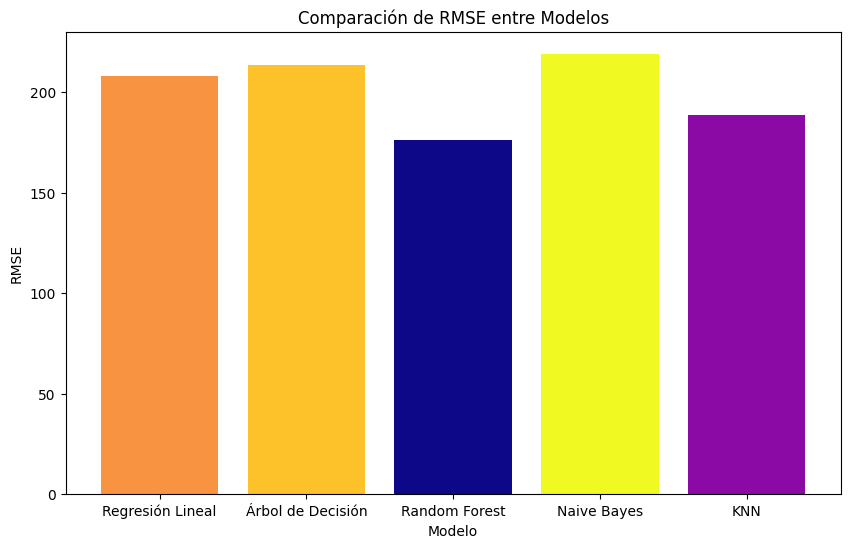

In [28]:
# Calcular RMSE para cada modelo
modelos = ['Regresión Lineal', 'Árbol de Decisión', 'Random Forest', 'Naive Bayes', 'KNN']
rmse_values = [
    np.sqrt(root_mean_squared_error(y_test, y_predRL)),
    np.sqrt(root_mean_squared_error(y_test, y_predDT)),
    np.sqrt(root_mean_squared_error(y_test, y_predRF)),
    np.sqrt(root_mean_squared_error(y_test, y_predNB)),
    np.sqrt(root_mean_squared_error(y_test, y_predKNN)),
]

# Normalizar los valores
norm = Normalize(vmin=min(rmse_values), vmax=max(rmse_values))

cmap = colormaps['plasma']

# Asignar colores a las barras
colors = [cmap(norm(value)) for value in rmse_values]

plt.figure(figsize=(10, 6))
plt.bar(modelos, rmse_values, color=colors)
plt.title('Comparación de RMSE entre Modelos')
plt.xlabel('Modelo')
plt.ylabel('RMSE')
plt.show()


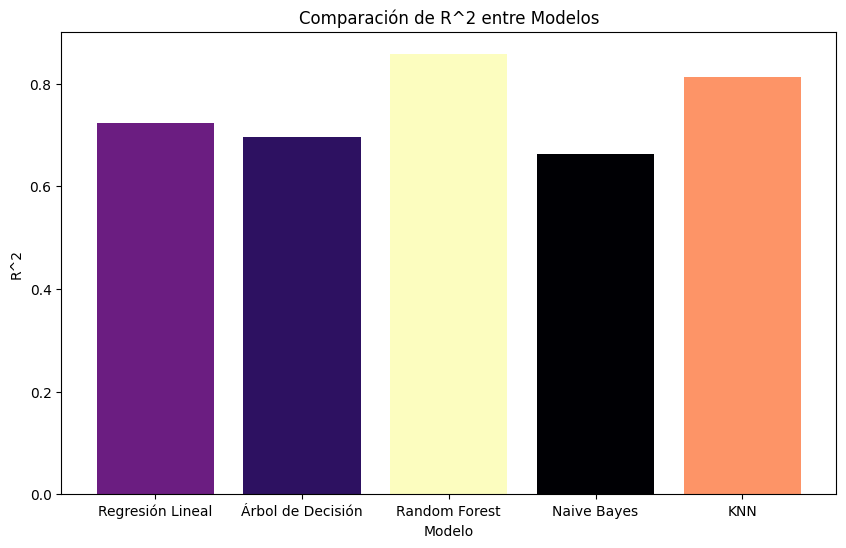

In [ ]:
r2_values = [
    r2_score(y_test, y_predRL),
    r2_score(y_test, y_predDT),
    r2_score(y_test, y_predRF),
    r2_score(y_test, y_predNB),
    r2_score(y_test, y_predKNN),
]

# Normalizar los valores de R²
norm = Normalize(vmin=min(r2_values), vmax=max(r2_values))

cmap = colormaps['plasma']

# Asignar colores a las barras
colors = [cmap(norm(value)) for value in r2_values]

plt.figure(figsize=(10, 6))
plt.bar(modelos, r2_values, color=colors)
plt.title('Comparación de R^2 entre Modelos')
plt.xlabel('Modelo')
plt.ylabel('R^2')
plt.show()


In [34]:
y_test.describe

<bound method NDFrame.describe of 529     200624
491     133000
459     110000
279     192000
655      88000
         ...  
271     241500
445     127500
654     350000
1280    227000
898     611657
Name: SalePrice, Length: 438, dtype: int64>

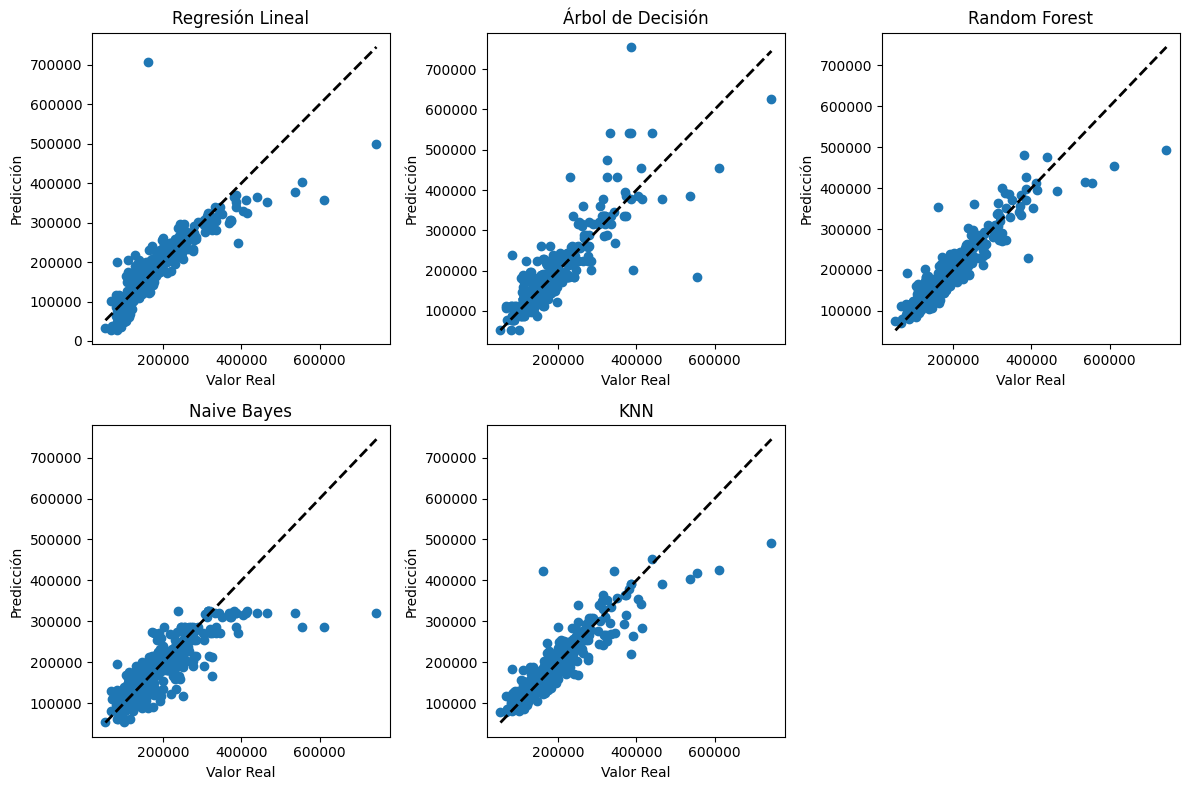

In [ ]:
plt.figure(figsize=(12, 8))

# Para cada modelo
plt.subplot(2, 3, 1)
plt.scatter(y_test, y_predRL, label='Regresión Lineal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Regresión Lineal')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')

plt.subplot(2, 3, 2)
plt.scatter(y_test, y_predDT, label='Árbol de Decisión')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Árbol de Decisión')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')

plt.subplot(2, 3, 3)
plt.scatter(y_test, y_predRF, label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Random Forest')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')

plt.subplot(2, 3, 4)
plt.scatter(y_test, y_predNB, label='Naive Bayes')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Naive Bayes')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')

plt.subplot(2, 3, 5)
plt.scatter(y_test, y_predKNN, label='KNN')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('KNN')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')

plt.tight_layout()
plt.show()
